### Generate time series from given PSD

Example script to generate a sequence of phase errors (to apply in the simulations) by taking the inverse discrete Fourier transform of the square root of the power spectral density (created by Andy).

1) Define the upper limit on the frequency range of the noise spectrum in units of the revolution frequency, frange, Hz

2) Create an example power spectral density, $\rm PSD(f(k))$

3) Before applying the iDFT:

a) Convert the noise power to FFT amplitue, $A(f(k))= \sqrt{(PSD(f(k))}$

b) Give each spectral component a random phase, uniformly distributed between 0 and the frange, $\rm Phi(f(k))$

c) Construct a frequency domain signal $\rm Z(f(k)) = A(f(k)) \cdot e^{i  Phi(f(k))}$. This is the FFT of the noise spectrum

- Note that this signal contains only the positive-frequency terms,  f(k) > 0 (one-sided).
- However, the fft as returned from the numpy functions include also the negative-frequency terms. Specifically it is ordered as follows:
        - a[0] contains the zero frequency terms

        - a[1:n//2] contains the positive-frequency terms,

        - a[n//2 + 1:] contains the negative-frequency terms, in increasing order starting from the most negative frequency.
- In order to bring the signal $\rm Z(f(k))$ at this form, we:

    a)  Create a list with the complex conjugates of all but the first elements of the frequency signal, the first element is set later to zero
    
    b)  We reverse the order of the list and merge it with the initial signal
    
    c)  Set the first element to zero
    
 4) Apply the iDFT. 
 
 
 The output of the iDFT will be a random time series on the finite (bounded, limited) time interval t = 0 to tmax = (N-1) X Dt, where Dt = 1 / (frange).

 The noise signal (time series), variable $phaseerrors$, is the real part of the result. 
 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
params = {'legend.fontsize': 16,
          'axes.labelsize': 17,
          'xtick.labelsize': 17,
          'ytick.labelsize': 17.}

plt.rc('text', usetex=False)
plt.rcParams.update(params)

In [6]:
frange = 5001 # Upper limit on the frequency, Hz

In [17]:
peak = 1000 # the peak of the PSD, Hz
powerspectrum = 1e4*np.power(1000.**2 + (np.arange(1, frange)-peak)**2, -1) # the first term defines the amplitude of the signal

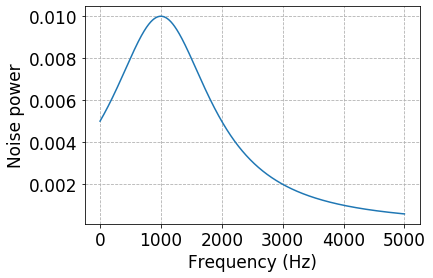

In [18]:
plt.plot(powerspectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Noise power')
plt.grid(True, linestyle='--')

In [191]:
# Convert the noise power to fft amplitude, A(f(k))
A = np.sqrt(powerspectrum)

In [192]:
#Give each spectral component a random phase, uniformly distributed between 0 and the frange, Phi(f(k))
phi = np.exp(1j*2*np.pi*np.random.normal(0,1,frange-1))

In [199]:
###    Construct a frequency domain signal Z(f(k)) = A(f(k)) X e^(i X PHI(f(k))), this is the FFT of the noise spectrum
phaseerrorsfft = A*phi
print(phaseerrorsfft)

[ 0.05074   -0.04929964j -0.07063271+0.00458591j -0.03068994+0.06382123j
 ... -0.01148355-0.02137562j -0.00465424-0.02380862j
  0.00069208-0.02424369j]


In [207]:
# complex conjugate of all but the first element
phaseerrorsfft_conj = np.conj(phaseerrorsfft[1:])
# Reverse the list
reversed_list = phaseerrorsfft_conj[::-1]
# merge them
merged_list = list(phaseerrorsfft) + list(reversed_list)
merged_list[0] = 0

In [208]:
phaseerrors = np.real(np.fft.ifft(merged_list))

Text(0, 0.5, 'Phase error')

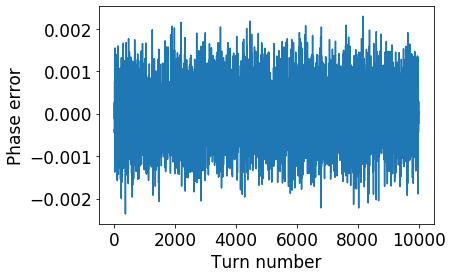

In [209]:
plt.plot(phaseerrors)
plt.xlabel('Turn number')
plt.ylabel('Phase error')
plt.grid(True, linestyle='--')

Text(0, 0.5, 'Noise power')

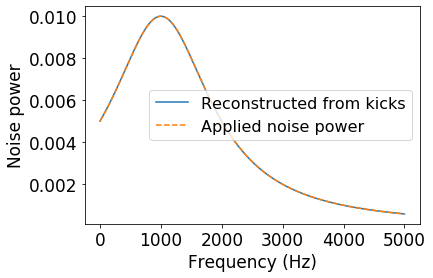

In [210]:
#Reconstruct the noise power spectrum from the phase errors
phaseerrorsfft1 = np.fft.fft(phaseerrors)
plt.plot(np.abs(phaseerrorsfft1[1:frange])**2, label='Reconstructed from kicks')
plt.plot(powerspectrum, label='Applied noise power', linestyle='--')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Noise power')
plt.grid(True, linestyle='--')